In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [29]:
# 文件路径
train_file_path = "Xy_train.csv"
val_file_path = "Xy_val.csv"
test_file_path = "Xy_test.csv"

# 读取数据
train_data = pd.read_csv(train_file_path)
val_data = pd.read_csv(val_file_path)
test_data = pd.read_csv(test_file_path)

# 分离特征和目标
X_train = train_data.drop(columns=['target']).values
y_train = train_data['target'].values

X_val = val_data.drop(columns=['target']).values
y_val = val_data['target'].values

X_test = test_data.drop(columns=['target']).values
y_test = test_data['target'].values


# 确认读取结果
print("Train data shape:", X_train.shape, "Target shape:", y_train.shape)
print("Validation data shape:", X_val.shape, "Target shape:", y_val.shape)
print("Test data shape:", X_test.shape, "Target shape:", y_test.shape)

Train data shape: (578421, 30) Target shape: (578421,)
Validation data shape: (123949, 30) Target shape: (123949,)
Test data shape: (123947, 30) Target shape: (123947,)


In [30]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

c:\Apps\anacoda\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.92474e-35): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Linear Regression (Test Set) Performance:
Mean Squared Error (MSE): 0.0000
Mean Absolute Error (MAE): 0.0018
R^2 Score: -0.5398
------------------------------
Ridge Regression (Test Set) Performance:
Mean Squared Error (MSE): 0.0000
Mean Absolute Error (MAE): 0.0017
R^2 Score: -0.4374
------------------------------
Linear Regression (Validation Set) Performance:
Mean Squared Error (MSE): 0.0000
Mean Absolute Error (MAE): 0.0019
R^2 Score: -0.4458
------------------------------
Ridge Regression (Validation Set) Performance:
Mean Squared Error (MSE): 0.0000
Mean Absolute Error (MAE): 0.0018
R^2 Score: -0.3736
------------------------------


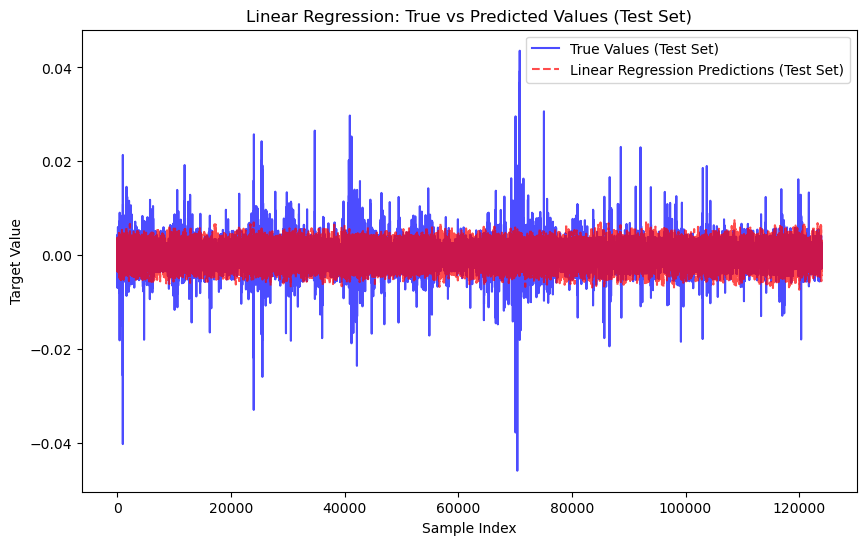

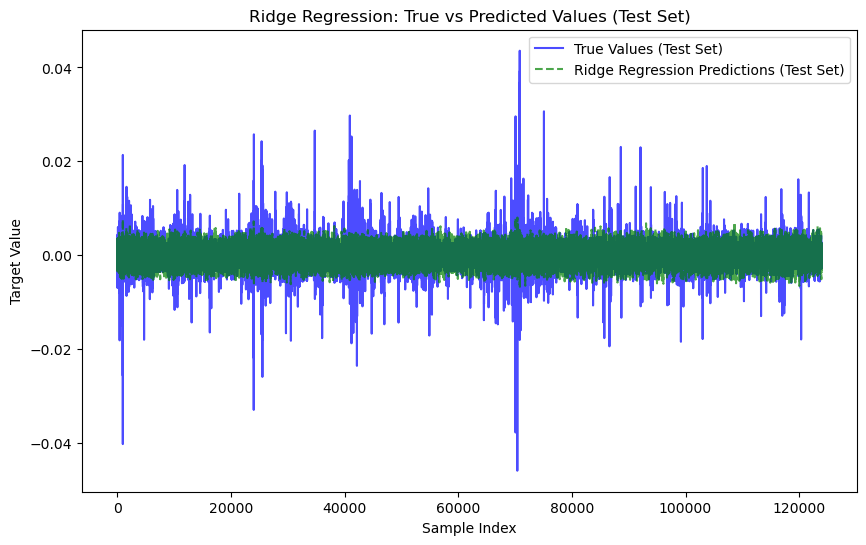

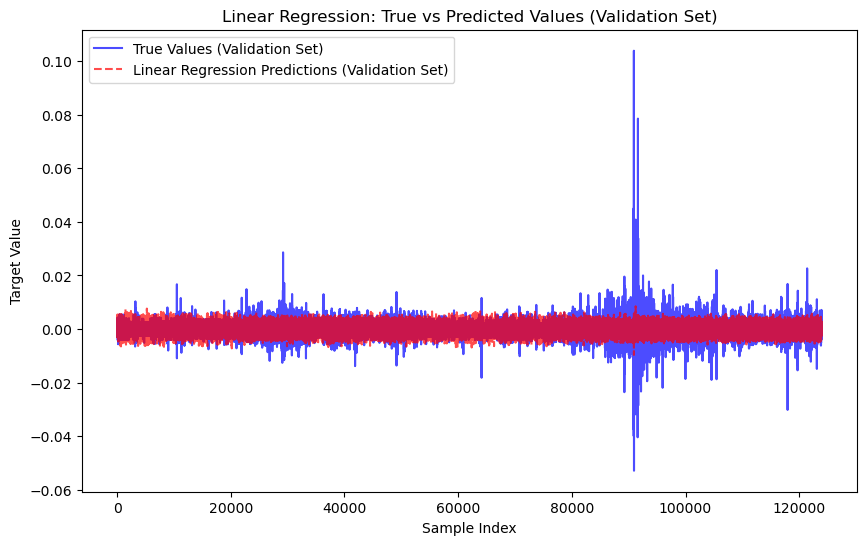

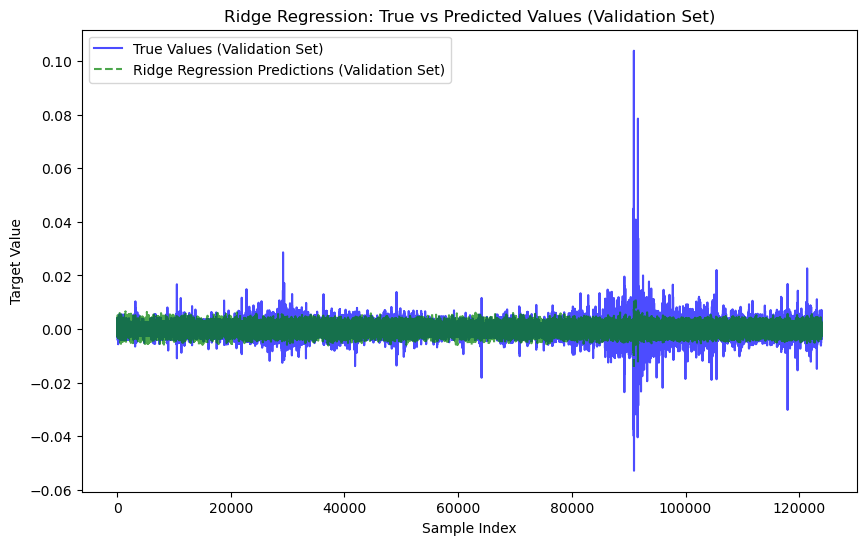

In [31]:
# 假设现在不再使用归一化和标准化后的数据。
# 因此，X_train, X_val, X_test, y_train, y_val, y_test 都是原始数据（或仅经过特征选择但未进行缩放）。

# 初始化模型
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)  # alpha 控制正则化强度，值越大正则化越强

# 训练模型（仅使用训练集）
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

# 在测试集上预测
y_test_pred_linear = linear_model.predict(X_test)
y_test_pred_ridge = ridge_model.predict(X_test)

# 在验证集上预测
y_val_pred_linear = linear_model.predict(X_val)
y_val_pred_ridge = ridge_model.predict(X_val)

# 不进行反归一化，因为没有使用归一化
y_test_original = y_test
y_test_pred_linear_original = y_test_pred_linear
y_test_pred_ridge_original = y_test_pred_ridge

y_val_original = y_val
y_val_pred_linear_original = y_val_pred_linear
y_val_pred_ridge_original = y_val_pred_ridge

# 定义评估函数
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    print("-" * 30)

# 测试集性能评估（原始值）
evaluate_model(y_test_original, y_test_pred_linear_original, "Linear Regression (Test Set)")
evaluate_model(y_test_original, y_test_pred_ridge_original, "Ridge Regression (Test Set)")

# 验证集性能评估（原始值）
evaluate_model(y_val_original, y_val_pred_linear_original, "Linear Regression (Validation Set)")
evaluate_model(y_val_original, y_val_pred_ridge_original, "Ridge Regression (Validation Set)")

import matplotlib.pyplot as plt

# 绘制测试集预测结果（Linear Regression）
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label="True Values (Test Set)", color="blue", alpha=0.7)  # True values
plt.plot(y_test_pred_linear_original, label="Linear Regression Predictions (Test Set)", color="red", linestyle="--", alpha=0.7)
plt.title("Linear Regression: True vs Predicted Values (Test Set)")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.show()

# 绘制测试集预测结果（Ridge Regression）
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label="True Values (Test Set)", color="blue", alpha=0.7)  # True values
plt.plot(y_test_pred_ridge_original, label="Ridge Regression Predictions (Test Set)", color="green", linestyle="--", alpha=0.7)
plt.title("Ridge Regression: True vs Predicted Values (Test Set)")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.show()

# 绘制验证集预测结果（Linear Regression）
plt.figure(figsize=(10, 6))
plt.plot(y_val_original, label="True Values (Validation Set)", color="blue", alpha=0.7)  # True values
plt.plot(y_val_pred_linear_original, label="Linear Regression Predictions (Validation Set)", color="red", linestyle="--", alpha=0.7)
plt.title("Linear Regression: True vs Predicted Values (Validation Set)")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.show()

# 绘制验证集预测结果（Ridge Regression）
plt.figure(figsize=(10, 6))
plt.plot(y_val_original, label="True Values (Validation Set)", color="blue", alpha=0.7)  # True values
plt.plot(y_val_pred_ridge_original, label="Ridge Regression Predictions (Validation Set)", color="green", linestyle="--", alpha=0.7)
plt.title("Ridge Regression: True vs Predicted Values (Validation Set)")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.show()

XGBoost Performance (Test Set):
XGBoost Performance:
Mean Squared Error (MSE): 0.0000
Mean Absolute Error (MAE): 0.0014
R^2 Score: -0.0148
Correlation Coefficient: 0.0977
------------------------------
XGBoost Performance (Validation Set):
XGBoost Performance:
Mean Squared Error (MSE): 0.0000
Mean Absolute Error (MAE): 0.0015
R^2 Score: -0.1055
Correlation Coefficient: 0.0482
------------------------------


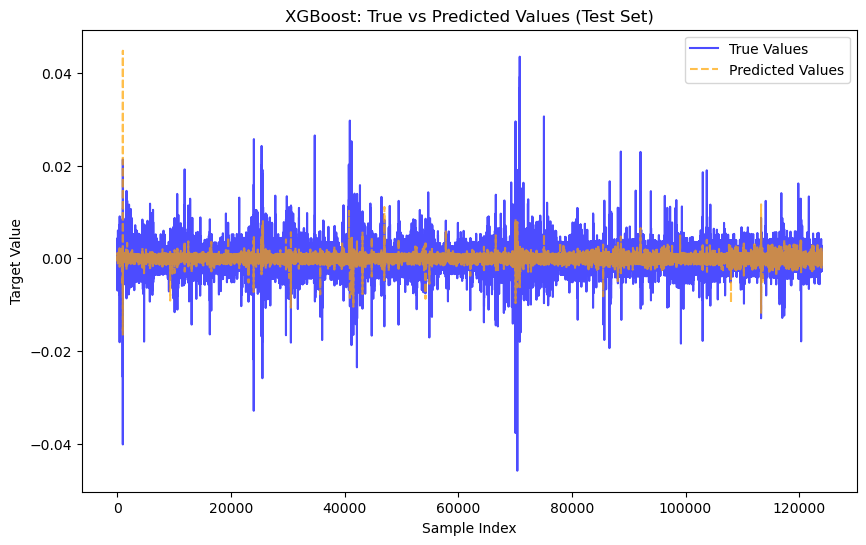

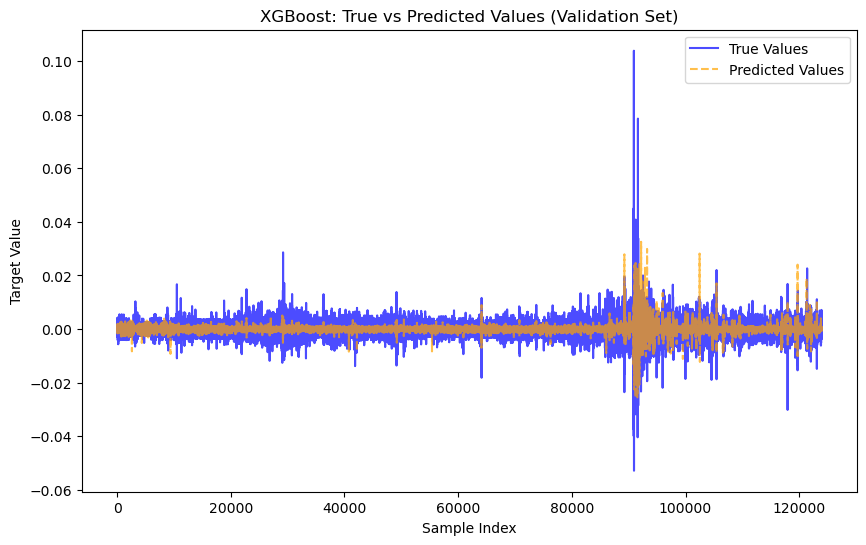

In [32]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 不需要目标值归一化器，所以不加载 target_scaler
# 不需要 joblib.load("target_scaler.pkl")

# 定义模型
models = {
    "XGBoost": XGBRegressor(),
}

# 存储预测结果
predictions = {}

# 性能评估函数
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    correlation = np.corrcoef(y_true, y_pred)[0, 1]  # 计算皮尔逊相关系数
    
    print(f"{model_name} Performance:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    print(f"Correlation Coefficient: {correlation:.4f}")
    print("-" * 30)

for model_name, model in models.items():
    # 模型训练
    model.fit(X_train, y_train)
    
    # 测试集预测 (不反归一化，直接使用原始值)
    y_test_pred = model.predict(X_test)
    
    # 验证集预测 (不反归一化，直接使用原始值)
    y_val_pred = model.predict(X_val)
    
    # 存储预测结果
    predictions[model_name] = {
        "y_test_pred": y_test_pred,
        "y_val_pred": y_val_pred
    }
    
    # 性能评估（使用原始值）
    print(f"{model_name} Performance (Test Set):")
    evaluate_model(y_test, y_test_pred, model_name)
    
    print(f"{model_name} Performance (Validation Set):")
    evaluate_model(y_val, y_val_pred, model_name)

# 可视化函数
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label="True Values", color="blue", alpha=0.7)
    plt.plot(y_pred, label="Predicted Values", color="orange", linestyle="--", alpha=0.7)
    plt.title(title)
    plt.xlabel("Sample Index")
    plt.ylabel("Target Value")
    plt.legend()
    plt.show()

# 可视化所有模型预测结果（使用原始值）
for model_name, preds in predictions.items():
    plot_predictions(y_test, preds["y_test_pred"], 
                     f"{model_name}: True vs Predicted Values (Test Set)")
    plot_predictions(y_val, preds["y_val_pred"], 
                     f"{model_name}: True vs Predicted Values (Validation Set)")

In [33]:
df_original = pd.read_csv("1m_ta.csv")
# 计算要提取的数据点数量
num_points = len(y_test_pred)

# 从 df_original 中获取最后 num_points 个数据点的索引
print_date = df_original['date'].iloc[-num_points:]


In [48]:
initial_funds =100000
transaction_fee_rate = 0.0001  # 交易费用率
points_per_day = 1440
points_per_year = points_per_day * 365

In [49]:
def trade_strategy(y_pred, y_test, upper_percentile):
    """
    使用单一上阈值进行交易策略：
    当预测值大于上阈值时全仓做多，否则自动平仓（空仓）。
    """

    # 计算上阈值
    upper_threshold = np.percentile(y_pred, upper_percentile)
    
    funds = initial_funds  # 初始资金
    funds_over_time = []  # 资金变化记录
    total_fees = 0.0  # 总交易费用
    trade_count = 0  # 总交易次数
    daily_trade_counts = []  # 每日交易次数
    total_volume = 0.0  # 累计交易额
    previous_allocation = 0.0  # 初始仓位（0表示空仓）
    previous_funds = funds  # 上期资金
    periodic_returns = []  # 收益率记录

    # 记录每日交易次数
    daily_trade_count = 0

    # 模拟交易
    for i, pred in enumerate(y_pred):
        actual_return = y_test[i]  # 实际收益

        # 根据预测值决定当前仓位逻辑（仅使用上阈值）
        if pred > upper_threshold and previous_allocation == 0.0:
            # 从空仓转为全仓做多
            allocation = 1.0
        elif pred <= upper_threshold and previous_allocation == 1.0:
            # 从全仓回到空仓
            allocation = 0.0
        else:
            # 不改变仓位
            allocation = previous_allocation

        # 如果仓位有变化，处理买入或卖出逻辑
        if allocation != previous_allocation:
            trade_amount = funds * abs(allocation - previous_allocation)  # 交易金额
            fee = trade_amount * transaction_fee_rate  # 交易费用
            total_fees += fee  # 累计交易费用
            funds -= fee  # 扣除交易费用
            total_volume += trade_amount  # 累计交易额
            trade_count += 1  # 记录交易次数
            daily_trade_count += 1  # 当日交易次数

        # 根据当前仓位计算收益（只在持仓时更新资金）
        if allocation == 1.0:
            funds *= (1 + actual_return)

        # 记录资金随时间的变化
        funds_over_time.append(funds)

        # 记录本期收益率
        if i > 0:
            period_return = (funds - previous_funds) / previous_funds
            periodic_returns.append(period_return)

        # 更新前一时期的资金和仓位
        previous_funds = funds
        previous_allocation = allocation

        # 每天结束时记录交易次数
        if (i + 1) % points_per_day == 0:
            daily_trade_counts.append(daily_trade_count)
            daily_trade_count = 0

    # 若最后一天未满一天步数，则补充剩余的交易次数
    if daily_trade_count > 0:
        daily_trade_counts.append(daily_trade_count)

    # 总周期数
    total_periods = len(y_pred)

    # 单利年化收益率计算
    total_return = (funds - initial_funds) / initial_funds
    annualized_return = total_return * (points_per_year / total_periods)

    # 夏普比率计算
    if len(periodic_returns) > 1:
        mean_period_return = np.mean(periodic_returns)
        std_period_return = np.std(periodic_returns)

        if std_period_return != 0:
            sharpe_ratio = (mean_period_return / std_period_return) * np.sqrt(points_per_year)
        else:
            sharpe_ratio = 0.0  # 避免除以零
    else:
        sharpe_ratio = 0.0

    # 最大回撤
    if len(funds_over_time) > 1:
        cummax = np.maximum.accumulate(funds_over_time)
        drawdowns = 1 - np.array(funds_over_time) / cummax
        max_drawdown = np.max(drawdowns)
    else:
        max_drawdown = 0.0

    # 平均每日交易次数
    avg_daily_trades = np.mean(daily_trade_counts)

    return {
        "funds_over_time": funds_over_time,
        "annualized_return": annualized_return,
        "sharpe_ratio": sharpe_ratio,
        "max_drawdown": max_drawdown,
        "upper_percentile": upper_percentile,
        "avg_daily_trades": avg_daily_trades,
        "trade_count": trade_count  # 总交易次数
    }

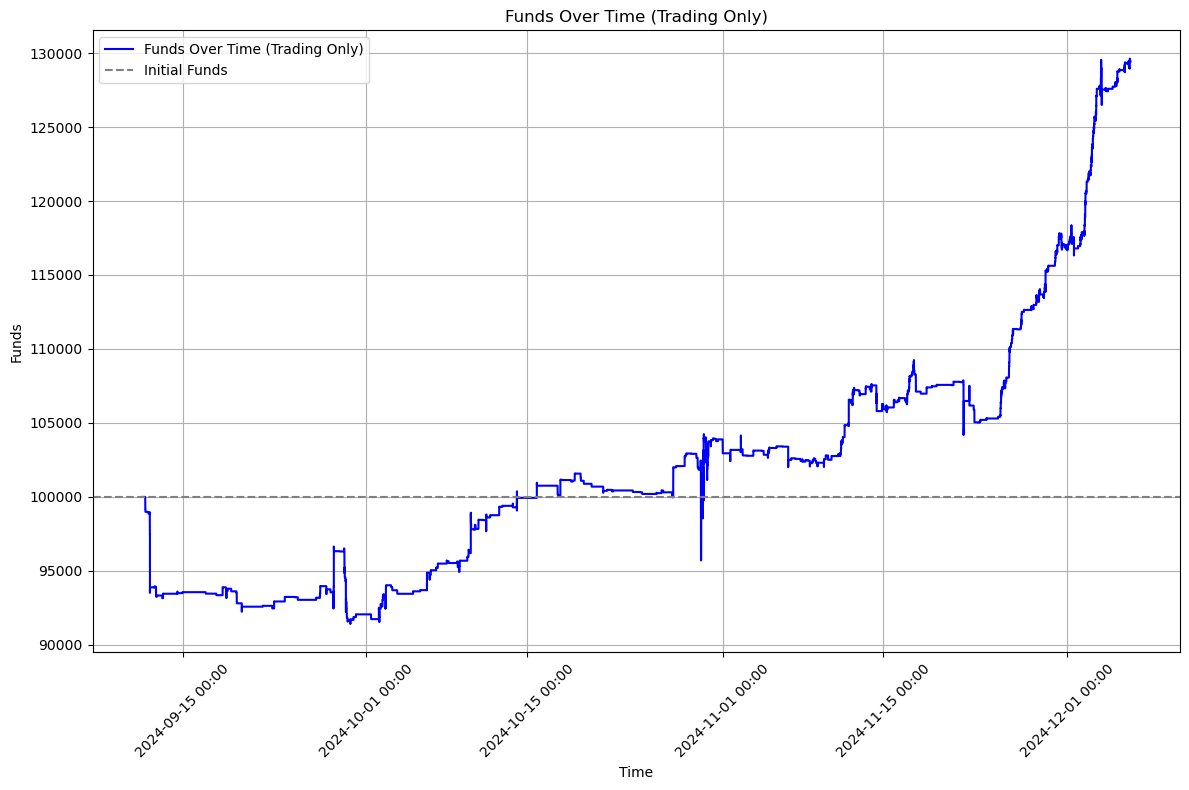

Best Strategy:
Upper Percentile: 99.10000000000005
Annualized Return: 124.8114%
Sharpe Ratio: 4.28
Max Drawdown: 8.5876%
Avg Daily Trades: 19.75
Total Trades: 1718.00


In [53]:
upper_percentiles = np.arange(100.0, 99, -0.05)  

# 存储每种策略的结果
strategies_results = []

# 遍历上限分位点
for upper_percentile in upper_percentiles:
    result = trade_strategy(y_test_pred, y_test, upper_percentile)
    strategies_results.append(result)

# 筛选年化收益最高的前 10 个策略
top_10_return = sorted(strategies_results, key=lambda x: x["annualized_return"], reverse=True)[:10]

# 筛选夏普比率最高的前 10 个策略
top_10_sharpe = sorted(strategies_results, key=lambda x: x["sharpe_ratio"], reverse=True)[:10]

# 筛选收益最高的策略（以年化收益为标准）
best_strategy = top_10_return[0]  
funds_over_time = best_strategy["funds_over_time"]
upper_percentile = best_strategy["upper_percentile"]

# 根据实际数据长度获取对应日期序列
num_points = len(y_test_original)
print_date = df_original['date'].iloc[-num_points:]
print_date = pd.to_datetime(print_date)

plt.figure(figsize=(12, 8))

# 绘制策略资金曲线
plt.plot(print_date, funds_over_time, label="Funds Over Time (Trading Only)", color="blue")

# 初始资金线
plt.axhline(initial_funds, color="gray", linestyle="--", label="Initial Funds")

# 设置 x 轴日期格式与密度
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=5, maxticks=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M"))

plt.xticks(rotation=45)
plt.title("Funds Over Time (Trading Only)")
plt.xlabel("Time")
plt.ylabel("Funds")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# 打印最佳策略参数
print("Best Strategy:")
print(f"Upper Percentile: {upper_percentile}")
print(f"Annualized Return: {best_strategy['annualized_return']:.4%}")
print(f"Sharpe Ratio: {best_strategy['sharpe_ratio']:.2f}")
print(f"Max Drawdown: {best_strategy['max_drawdown']:.4%}")
print(f"Avg Daily Trades: {best_strategy['avg_daily_trades']:.2f}")
print(f"Total Trades: {best_strategy['trade_count']:.2f}")

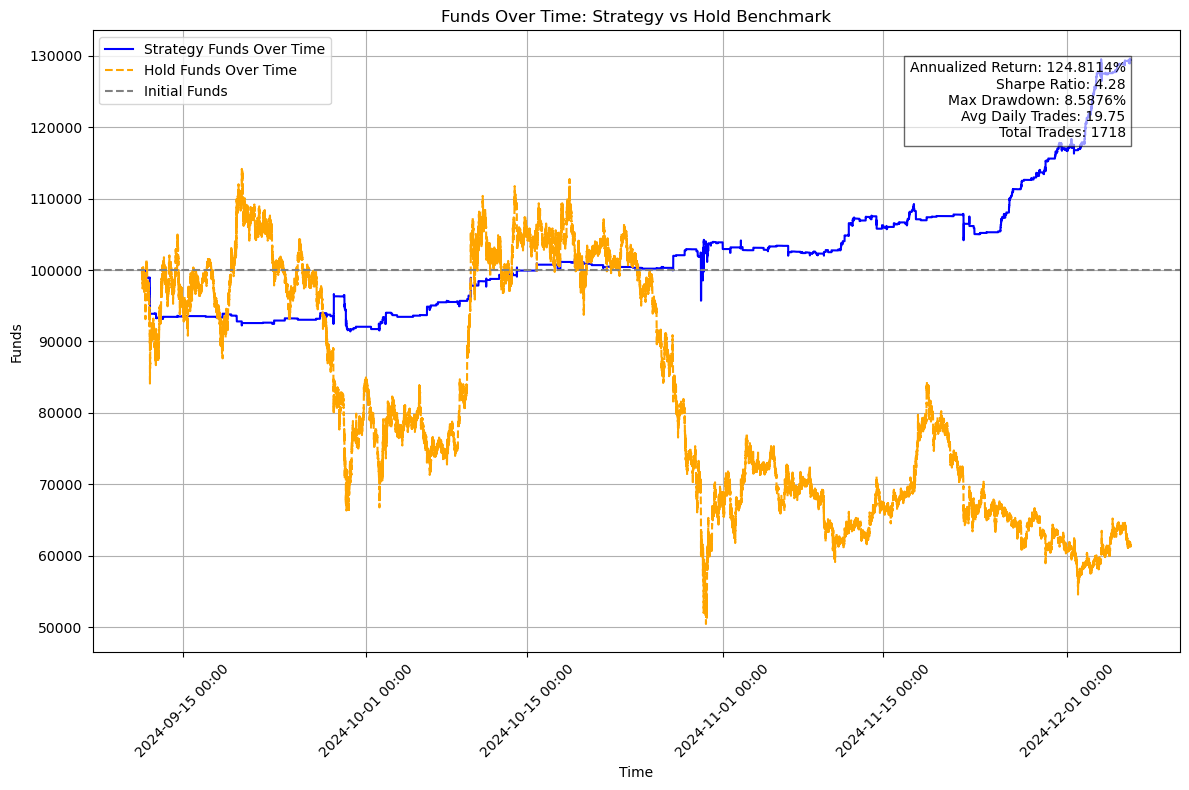

Final Funds if Holding: 61340.21


In [55]:
# 计算持有加密货币市场的收益曲线
hold_funds_over_time = [initial_funds]  # 初始资金

for actual_return in y_test_original:
    # 计算持有时的资金变化
    hold_funds_over_time.append(hold_funds_over_time[-1] * (1 + actual_return))

# 移除第一个初始值，保证与 print_date 对齐
hold_funds_over_time = hold_funds_over_time[1:]

# 可视化资金曲线（添加基准收益曲线）
plt.figure(figsize=(12, 8))
ax = plt.gca()  # 获取当前坐标轴对象

# 策略资金曲线
plt.plot(print_date, funds_over_time, label="Strategy Funds Over Time", color="blue")

# 持有收益曲线
plt.plot(print_date, hold_funds_over_time, label="Hold Funds Over Time", color="orange", linestyle="--")

# 初始资金线
plt.axhline(initial_funds, color="gray", linestyle="--", label="Initial Funds")

# 设置 x 轴日期格式与密度
ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=5, maxticks=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M"))

plt.xticks(rotation=45)
plt.title("Funds Over Time: Strategy vs Hold Benchmark")
plt.xlabel("Time")
plt.ylabel("Funds")
plt.legend()
plt.grid()
plt.tight_layout()

# 在图上添加绩效指标文本框
metrics_text = (
    f"Annualized Return: {best_strategy['annualized_return']:.4%}\n"
    f"Sharpe Ratio: {best_strategy['sharpe_ratio']:.2f}\n"
    f"Max Drawdown: {best_strategy['max_drawdown']:.4%}\n"
    f"Avg Daily Trades: {best_strategy['avg_daily_trades']:.2f}\n"
    f"Total Trades: {best_strategy['trade_count']:.0f}"
)

ax.text(
    0.95, 0.95, metrics_text,
    transform=ax.transAxes, fontsize=10,
    verticalalignment='top', horizontalalignment='right',
    bbox=dict(facecolor='white', alpha=0.6)
)

plt.show()

# 打印持有收益的最终资金值
print(f"Final Funds if Holding: {hold_funds_over_time[-1]:.2f}")

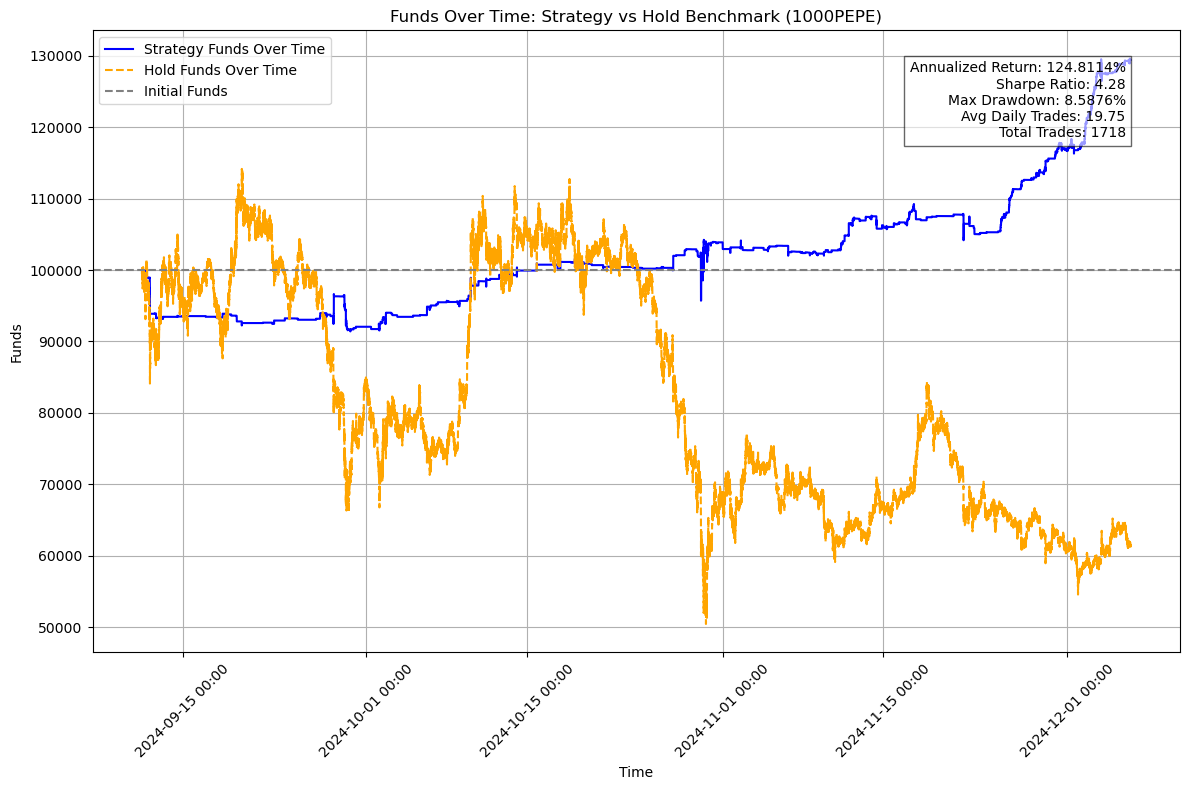

Final Funds if Holding (1000PEPE): 61340.21


In [56]:
# 计算持有加密货币市场的收益曲线
hold_funds_over_time = [initial_funds]  # 初始资金

for actual_return in y_test_original:
    # 计算持有时的资金变化
    hold_funds_over_time.append(hold_funds_over_time[-1] * (1 + actual_return))

# 移除第一个初始值，保证与 print_date 对齐
hold_funds_over_time = hold_funds_over_time[1:]

# 可视化资金曲线（添加基准收益曲线）
plt.figure(figsize=(12, 8))
ax = plt.gca()  # 获取当前坐标轴对象

# 策略资金曲线
plt.plot(print_date, funds_over_time, label="Strategy Funds Over Time", color="blue")

# 持有收益曲线
plt.plot(print_date, hold_funds_over_time, label="Hold Funds Over Time", color="orange", linestyle="--")

# 初始资金线
plt.axhline(initial_funds, color="gray", linestyle="--", label="Initial Funds")

# 设置 x 轴日期格式与密度
ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=5, maxticks=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M"))

plt.xticks(rotation=45)
plt.title("Funds Over Time: Strategy vs Hold Benchmark (1000PEPE)")
plt.xlabel("Time")
plt.ylabel("Funds")
plt.legend()
plt.grid()
plt.tight_layout()

# 在图上添加绩效指标文本框 (放在右上角)
metrics_text = (
    f"Annualized Return: {best_strategy['annualized_return']:.4%}\n"
    f"Sharpe Ratio: {best_strategy['sharpe_ratio']:.2f}\n"
    f"Max Drawdown: {best_strategy['max_drawdown']:.4%}\n"
    f"Avg Daily Trades: {best_strategy['avg_daily_trades']:.2f}\n"
    f"Total Trades: {best_strategy['trade_count']:.0f}"
)

ax.text(
    0.95, 0.95, metrics_text,
    transform=ax.transAxes, fontsize=10,
    verticalalignment='top', horizontalalignment='right',
    bbox=dict(facecolor='white', alpha=0.6)
)

plt.show()

# 打印持有收益的最终资金值（附上币名）
print(f"Final Funds if Holding (1000PEPE): {hold_funds_over_time[-1]:.2f}")


In [39]:
# 币的名字